In [624]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [625]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Union, Optional

from utils import load_json, save_json

In [621]:
from evaluate import (
    load_predicted_results,
    align_evaluation_data,
    compute_basic_metrics)

In [622]:
# Example usage
experiment_id = '4'
experiment_dir = f"./outputs/experiment_{str(experiment_id)}/output_dev"
dev_data_file = "data/dev_subset.csv" 

# Load results
df_pred = load_predicted_results(experiment_dir)
df_true = pd.read_csv(dev_data_file)

# Align data
y_true, y_pred, dialect_true, dialect_pred, ids = align_evaluation_data(df_true, df_pred)


Number of samples in merged data: 111


In [626]:
for i,j,k in zip(dialect_true, dialect_pred, ids):
    if i != j:
        print(f"True: {i}, Pred: {j}")
        row = df_true[df_true['ID'] == k]
        text = row['Text'].values[0]
        print(text)
        print("===================================")

True: Darija, Pred: Saudi
حتا حنا غادي نرجعو، و شكرا للفندق، كانو عطلة مزيانة.
True: Saudi, Pred: Darija
فيه فريق انيميشن رهيب غير انهم يتعاملون مع كل النزلاء بشكل حلو و محترم 
True: Saudi, Pred: Darija
فندق جيد خدماته مناسبة بالنسبة للسعر سعره ممتاز الغرفة مريحة و الحمام جيد و الفطور زين بشكل عام الفندق مناسب و لا فيه عيب واضح 
True: Saudi, Pred: Darija
انا فعلا اقدر اللي قدموه و لكن انطباعي ان ما تغير شي بعد الشكوى اشكر الاستاذ رامي مدير خدمة الغرف على كل جهوده في حل المشكلة بشكل مهني و اتمنى له كل خير 
True: Saudi, Pred: Darija
موقع الفندق واطلالة الحرم جميلة مره
True: Saudi, Pred: Darija
من السلبيات هو ما عندوش باب على الشارع، مكيعرفوهش الطاكسيات ماعرفتش علاش
True: Saudi, Pred: Darija
شفت واحد السرب ديال النمل داخل من تسجلت. ديك الساعة جبت البخاخ قتلتهم. ولكن كان خاصني نصبر للريحة
True: Darija, Pred: Saudi
مرينا بتجربتين سلبية في تابارد و في كل المرتين المضيفة كانت فظة
True: Saudi, Pred: Darija
الموسيقى مجهدة بزاف من 11 ديال الليل حتى بعد 3 دالصباح.
True: Saudi, Pred: Darija
 رابعا

In [627]:
compute_basic_metrics(y_true, y_pred)

{'accuracy': 0.8198198198198198,
 'precision_macro': 0.793939393939394,
 'recall_macro': 0.7390873015873015,
 'f1_macro': 0.7467358553732842,
 'precision_weighted': 0.8098280098280098,
 'recall_weighted': 0.8198198198198198,
 'f1_weighted': 0.8023823957871496}

In [628]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def print_classification_report(y_true, y_pred):
    # Convert the lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Print the classification report
    print(classification_report(y_true, y_pred))

# Print the classification report
print_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

    negative       0.85      0.98      0.91        48
     neutral       0.73      0.38      0.50        21
    positive       0.80      0.86      0.83        42

    accuracy                           0.82       111
   macro avg       0.79      0.74      0.75       111
weighted avg       0.81      0.82      0.80       111



Confusion Matrix:


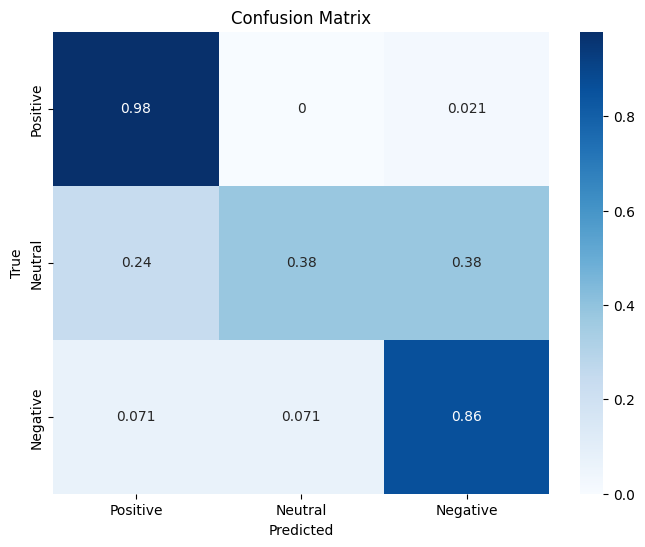

In [629]:
# plot cm matric

import matplotlib.pyplot as plt
import seaborn as sns

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')
print("Confusion Matrix:")


def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['Positive', 'Neutral' ,'Negative'])

In [630]:
# Error analysis - identify misclassified examples
misclassified = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

# Print misclassification statistics
print(f"Total misclassified: {len(misclassified)}/{len(y_true)} ({len(misclassified)/len(y_true)*100:.2f}%)")


Total misclassified: 20/111 (18.02%)


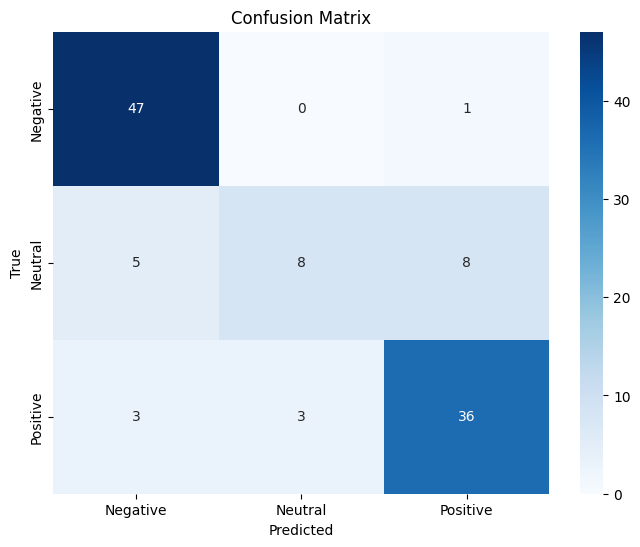

In [631]:
# Create confusion matrix for detailed error analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [632]:
# error analysis
for i,a,b,d in zip(ids, y_true, y_pred, dialect_true):
    if d=='Darija' and a=='neutral' and a != b:
        print(f"ID: {i}")
        row = df_true[df_true['ID'] == i]
        text = row['Text'].values[0]
        true_label = row['Sentiment'].values[0]
        true_dialect = row['Dialect'].values[0]
        print(text)
        print(f"True label: {true_label}")
        print(f"True dialect: {true_dialect}")


        predicted = load_json(os.path.join(experiment_dir, f"{i}.json"))
        predicted_label = predicted['structured_data']

        print(f"Predicted label: {predicted_label}")

        print("------------------")

ID: 1167.0
النقص فالتكلفة واضح بزاف، الغرف مزيانة والتشطيب زوين، وخدمة الغرف مزيانة، ولكن ما فيهاش فرن تاندور . تقليص التكلفة وصل للسحاب، ما كاينش صابون فالمراحيض ولا شامبوان، وموزع الشامبو فيه شوية الرغوة المزعجة ملي كيبغي يخرج السائل. كاين مشاكل فالبريزات، ومشكل فالحمام ومشكل فالغرفة. هادا هو كل شي، والبيبان ديال شي بيوت ما شي فبلاستهوم.
True label: neutral
True dialect: Darija
Predicted label: {'dialect': 'Darija', 'aspects': [{'name': 'Cost', 'sentiment': 'negative', 'justification': 'The review mentions that the reduction in cost is very noticeable "النقص فالتكلفة واضح بزاف", indicating dissatisfaction with the pricing strategy.'}, {'name': 'Rooms', 'sentiment': 'positive', 'justification': 'The review states that the rooms are nice "الغرف مزيانة والتشطيب زوين", which is a positive remark about the quality of the rooms.'}, {'name': 'Room Service', 'sentiment': 'positive', 'justification': 'The review mentions that room service is good "وخدمة الغرف مزيانة", indicating satisfaction 

In [633]:
# classification report for each dialect
def classification_report_per_dialect(y_true, y_pred, dialect_true, dialect_pred):
    unique_dialects = set(dialect_true)
    for dialect in unique_dialects:
        indices = [i for i, d in enumerate(dialect_true) if d == dialect]
        y_true_dialect = [y_true[i] for i in indices]
        y_pred_dialect = [y_pred[i] for i in indices]
        print(f"Classification report for {dialect}:")
        print(classification_report(y_true_dialect, y_pred_dialect))

# Print the classification report for each dialect
classification_report_per_dialect(y_true, y_pred, dialect_true, dialect_pred)

Classification report for Darija:
              precision    recall  f1-score   support

    negative       0.81      1.00      0.89        25
     neutral       0.75      0.27      0.40        11
    positive       0.82      0.86      0.84        21

    accuracy                           0.81        57
   macro avg       0.79      0.71      0.71        57
weighted avg       0.80      0.81      0.78        57

Classification report for Saudi:
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94        23
     neutral       0.71      0.50      0.59        10
    positive       0.78      0.86      0.82        21

    accuracy                           0.83        54
   macro avg       0.80      0.77      0.78        54
weighted avg       0.83      0.83      0.83        54



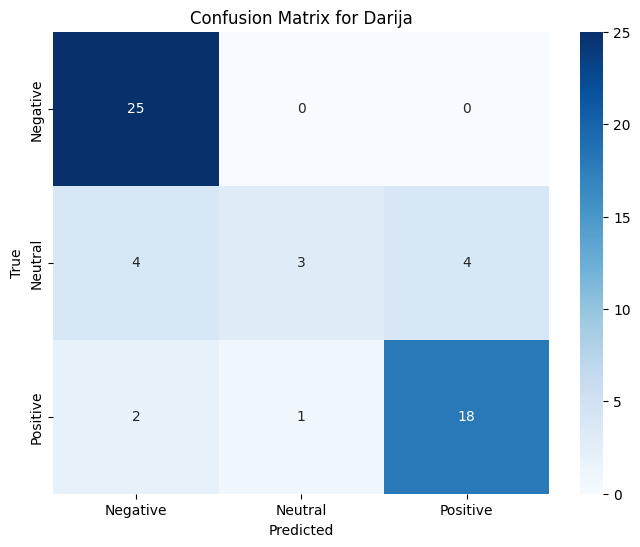

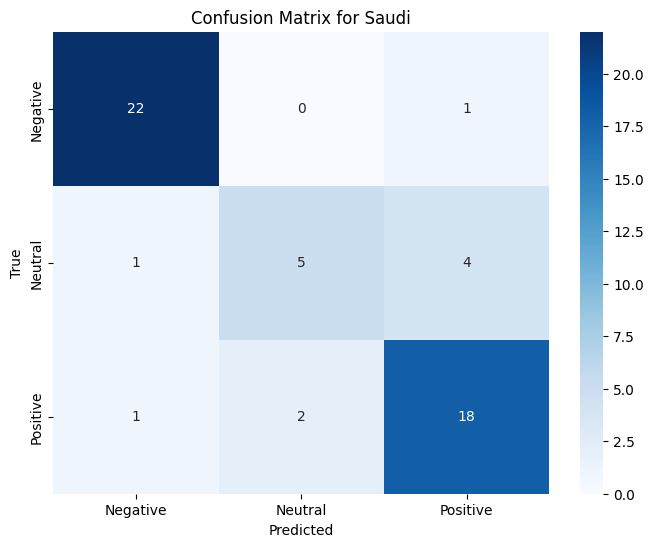

In [623]:
# confusion matrix for each dialect
def confusion_matrix_per_dialect(y_true, y_pred, dialect_true, dialect_pred):
    unique_dialects = set(dialect_true)
    for dialect in unique_dialects:
        indices = [i for i, d in enumerate(dialect_true) if d == dialect]
        y_true_dialect = [y_true[i] for i in indices]
        y_pred_dialect = [y_pred[i] for i in indices]
        cm = confusion_matrix(y_true_dialect, y_pred_dialect)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
                    yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {dialect}')
        plt.show()

# Print the confusion matrix for each dialect
confusion_matrix_per_dialect(y_true, y_pred, dialect_true, dialect_pred)